# Part 1 - Improve Cart-Pole

In [26]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import sys

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures and animations
%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
import gym

In [27]:
def plot_environment(env, figsize=(5,4)):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    plt.show()
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=repeat, interval=interval)

In [28]:
env = gym.make("CartPole-v0")

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [29]:
obs = env.reset()

In [30]:
obs

array([-0.01419308,  0.02660631, -0.01603403,  0.0367295 ])

In [31]:
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True   # no problem, let's use OpenAI gym's rendering function
except Exception:
    openai_cart_pole_rendering = False  # probably no X server available, let's use our own rendering function

def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        # use OpenAI gym's rendering function
        return env.render(mode="rgb_array")
    else:
        # rendering for the cart pole environment (in case OpenAI gym can't do it)
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # Blue Green Red
        pole_col = 0x669acc # Blue Green Red

        pos, vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)

def plot_cart_pole(env, obs):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>


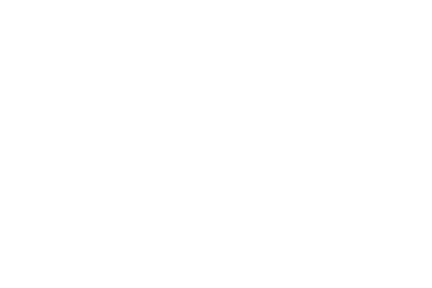

<IPython.core.display.Javascript object>


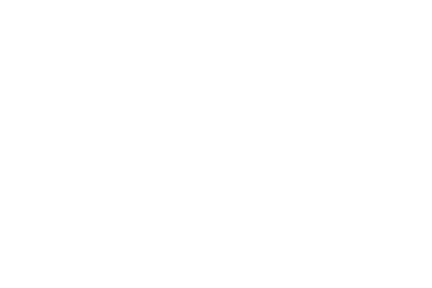

In [32]:
plot_cart_pole(env, obs)

In [62]:
frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
env.seed(0)
a =[]
a_v = []
v = []
p = []

total_reward = 0
gamma = .9
k = 0

for step in range(n_max_steps):
    img = render_cart_pole(env, obs)
    frames.append(img)

    # hard-coded policy
    position, velocity, angle, angular_velocity = obs

    if angle < 0:
        if angular_velocity > 1:
            action = 1
        else:
            action = 0
    else:
        if angular_velocity < -1:
            action = 0
        else:
            action = 1

    a.append(angle)
    a_v.append(angular_velocity)
    v.append(velocity)
    p.append(position)
    obs, reward, done, info = env.step(action)
    
    total_reward += reward * (gamma**k)
    k += 1
    print(position, velocity, angle, angular_velocity, total_reward, k)
    if done:
        break

-0.04456399437492168 0.04653909372423204 0.013269094558410327 -0.020998265615229175 1.0 1
-0.04363321250043704 0.24146826361142143 0.012849129246105744 -0.30946528078089636 1.9 2
-0.03880384722820861 0.43640480549403393 0.006659823630487817 -0.598068415850756 2.71 3
-0.03007575111832793 0.6314329390003991 -0.005301544686527304 -0.8886461548619563 3.439 4
-0.017447092338319946 0.4363833349373136 -0.023074467783766428 -0.597634507197336 4.0951 5
-0.008719425639573673 0.24159173560607214 -0.035027157927713146 -0.3123081811249209 4.68559 6
-0.0038875909274522303 0.046985845165219 -0.041273321550211566 -0.030874277683291984 5.217031 7
-0.00294787402414785 -0.14752066600744212 -0.0418908071038774 0.24850610814606983 5.6953279000000006 8
-0.005898287344296692 -0.34202010780116665 -0.036920684940956 0.5276870262259972 6.12579511 9
-0.012738689500320026 -0.5366036718075129 -0.02636694441643606 0.8085112463227757 6.5132155990000005 10
-0.023470762936470282 -0.7313545666042128 -0.0101967194899805

0.04199194774557845 0.04735553268267248 -0.04312698794402401 -0.0390427200534198 9.999996466591652 141
0.0429390583992319 -0.1471222945098697 -0.04390784234509241 0.23972737102774377 9.999996819932488 142
0.0399966125090345 -0.34159039788648804 -0.03911329492453754 0.5182436269679049 9.99999713793924 143
0.033164804551304744 -0.5361404583517256 -0.02874842238517944 0.7983491449423246 9.999997424145315 144
0.022441995384270233 -0.7308564440954128 -0.012781439486332948 1.0818515644172284 9.999997681730784 145
0.007824866502361976 -0.5355681367248684 0.00885559180201162 0.7851853896242895 9.999997913557706 146
-0.0028864962321353913 -0.340568973534526 0.02455929959449741 0.49530162382083404 9.999998122201935 147
-0.00969787570282591 -0.14580181361155853 0.03446533207091409 0.21045869446818338 9.999998309981741 148
-0.01261391197505708 0.04881082632492509 0.03867450596027776 -0.07115610160972302 9.999998478983567 149
-0.01163769544855858 0.2433575913077756 0.0372513839280833 -0.35139056554

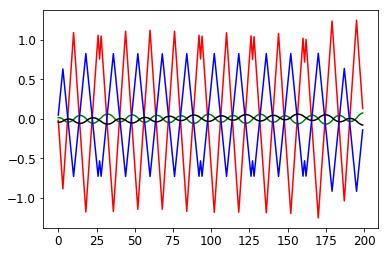

In [63]:
%matplotlib inline
plt.plot(a, 'g')
plt.plot(a_v, 'r')
plt.plot(v, 'b')
plt.plot(p, 'k')
plt.show()